In [1]:
!pip install lifelines

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi']=200
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('rainbow')

In [3]:
#Loading the Survival un-employment data

df = pd.read_csv("https://raw.githubusercontent.com/snehuuu28/Survival_Analysis/main/survival_unemployment.csv")

In [4]:
df

,spell,event,ui,logwage,age
0,5,1,0,6.89568,41
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22
...,...,...,...,...,...
3338,11,0,1,5.69373,41
3339,4,0,1,5.92959,27
3340,5,0,1,5.80513,30
3341,1,1,0,5.24175,29


In [5]:
df.describe()

,spell,event,ui,logwage,age
count,3343.000000,3343.000000,3343.000000,3343.000000,3343.000000
mean,6.247981,0.320969,0.552797,5.692994,35.443314
std,5.611271,0.466919,0.497279,0.535659,10.640204
min,1.000000,0.000000,0.000000,2.708050,20.000000
25%,2.000000,0.000000,0.000000,5.298320,27.000000
50%,5.000000,0.000000,1.000000,5.676750,34.000000
75%,9.000000,1.000000,1.000000,6.052090,43.000000
max,28.000000,1.000000,1.000000,7.600400,61.000000


In [6]:
df.spell

0        5
1       13
2       21
3        3
4        9
        ..
3338    11
3339     4
3340     5
3341     1
3342     8
Name: spell, Length: 3343, dtype: int64

In [7]:
#Spell is Referring to time

Time = df.spell

In [8]:
Time

0        5
1       13
2       21
3        3
4        9
        ..
3338    11
3339     4
3340     5
3341     1
3342     8
Name: spell, Length: 3343, dtype: int64

In [9]:
# Initiating the KaplanMeierFitter Model

kmf = KaplanMeierFitter()

In [10]:
df.head()

,spell,event,ui,logwage,age
0,5,1,0,6.89568,41
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22


<Axes: xlabel='timeline'>

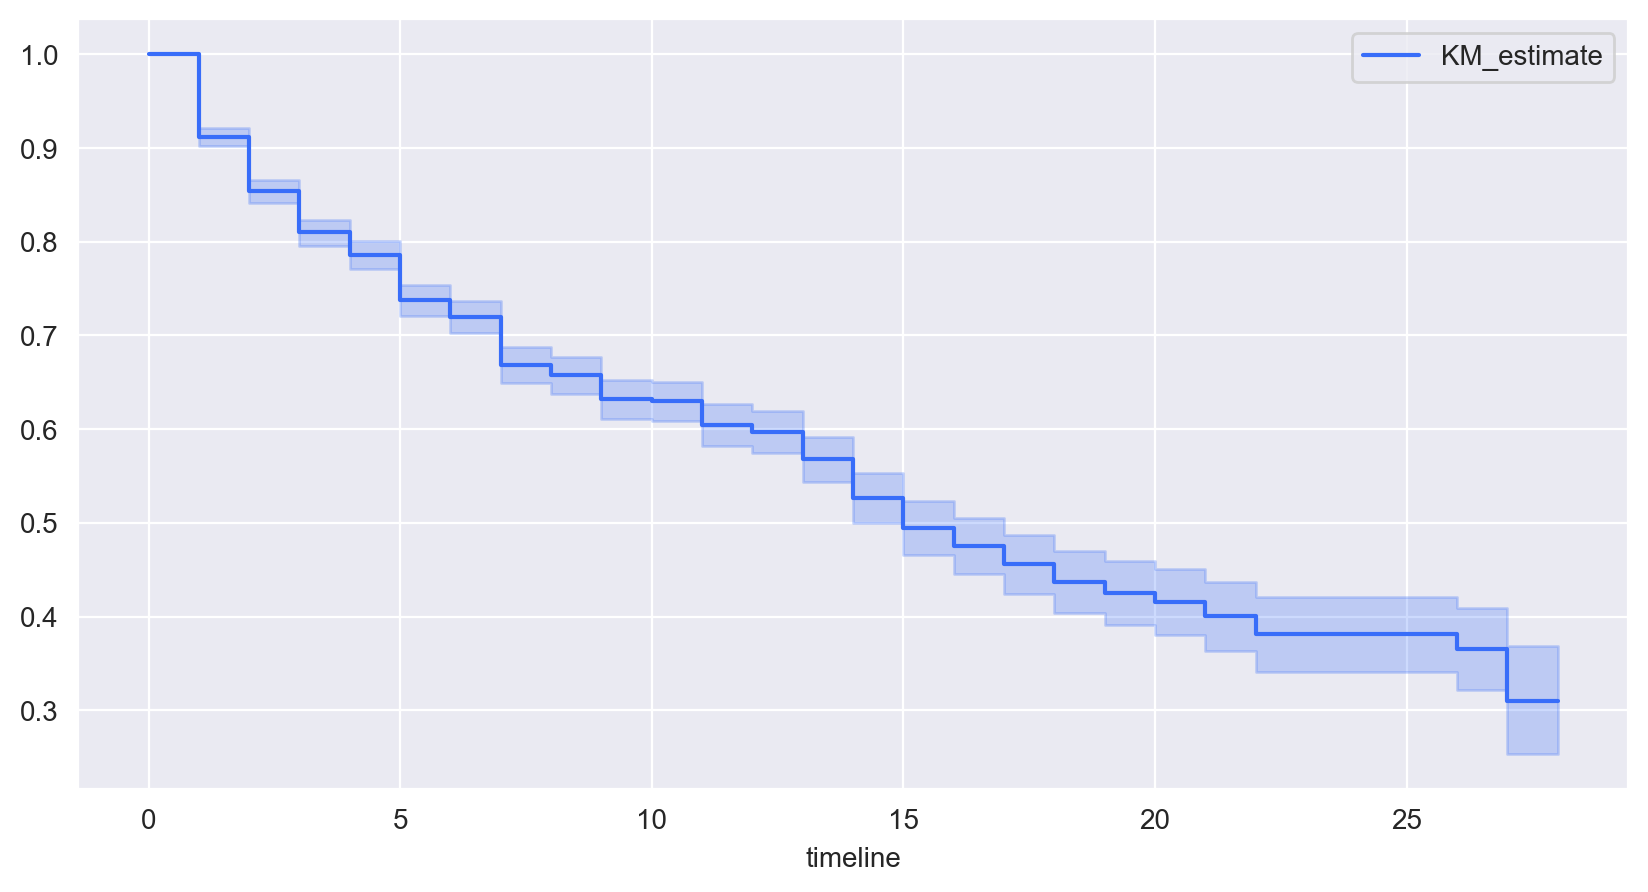

In [11]:
#Fitting KaplanMeierFitter Model on Time and Events for Death
kmf.fit(Time, event_observed = df.event)
#Time-Line Estimations Plot
kmf.plot()

In [12]:
df[df['ui']==0]

,spell,event,ui,logwage,age
0,5,1,0,6.89568,41
6,1,0,0,5.60947,24
7,3,1,0,6.16121,32
12,2,1,0,5.06259,39
14,1,1,0,5.28827,20
...,...,...,...,...,...
3326,2,1,0,5.50533,37
3331,7,0,0,6.16121,44
3332,1,1,0,5.22575,35
3333,2,0,0,5.56068,28


In [13]:
df[df['ui']==1]

,spell,event,ui,logwage,age
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22
5,11,0,1,6.85435,43
...,...,...,...,...,...
3337,5,0,1,5.57215,40
3338,11,0,1,5.69373,41
3339,4,0,1,5.92959,27
3340,5,0,1,5.80513,30


In [14]:
#Over Multiple Groups
#For each Group, here group is Ui

df.ui.value_counts()

ui
1    1848
0    1495
Name: count, dtype: int64

In [15]:
df.event[df.ui==1]

1       1
2       1
3       1
4       0
5       0
       ..
3337    0
3338    0
3339    0
3340    0
3342    1
Name: event, Length: 1848, dtype: int64

<Axes: xlabel='timeline'>

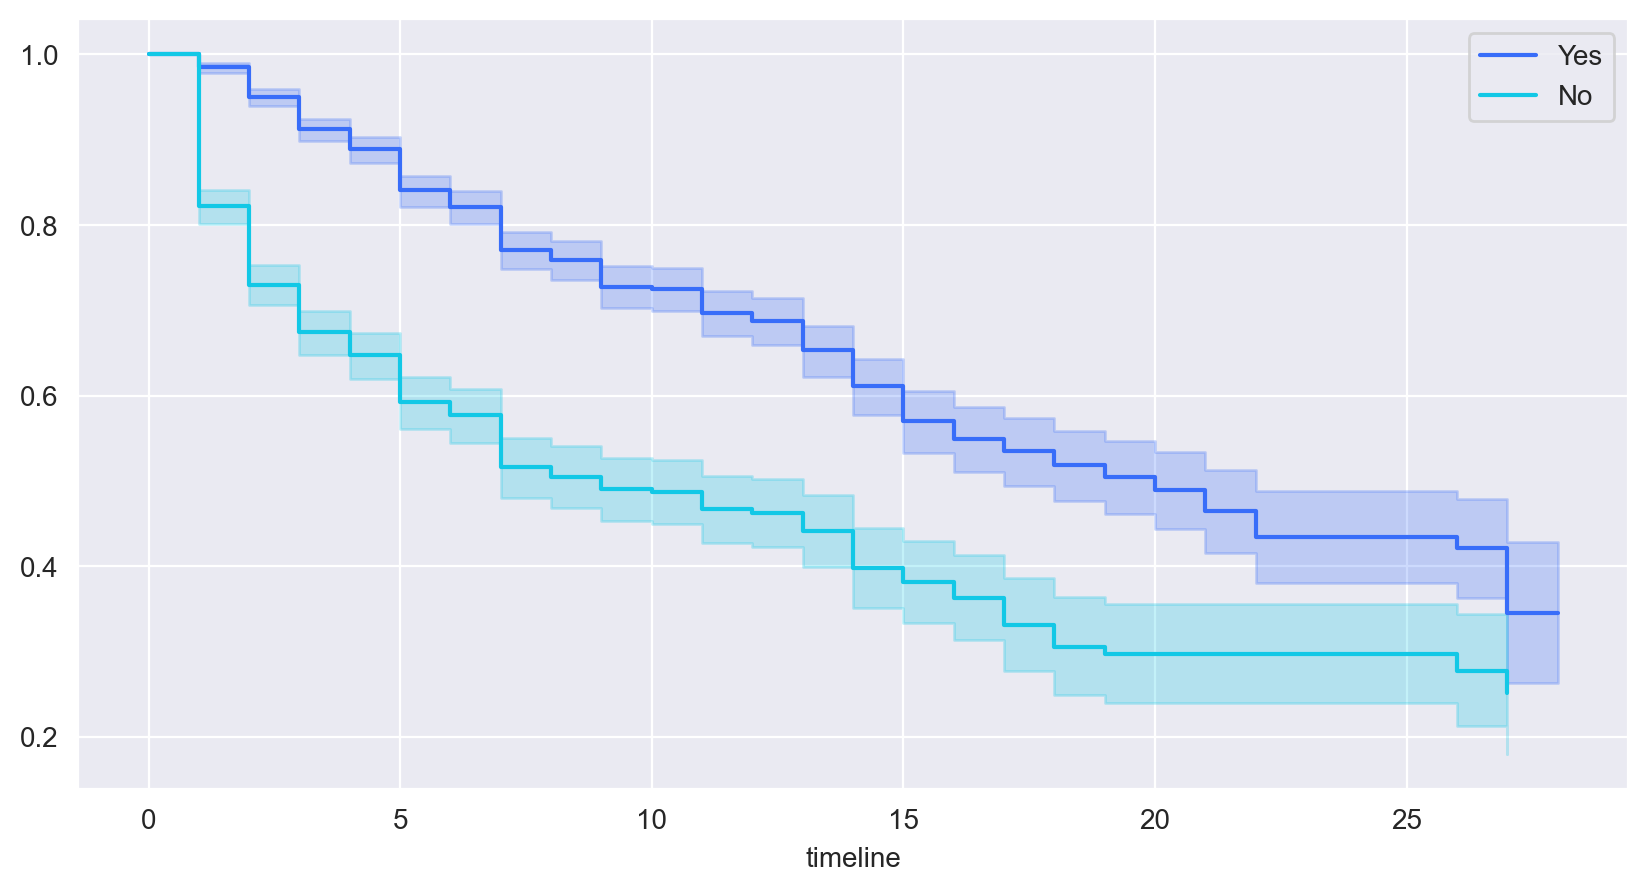

In [16]:
#Applying KaplanMeierFitter model on Time and Events for the group "1"

kmf.fit(Time[df.ui==1], df.event[df.ui==1], label='Yes')
kmf.plot()

#Applying KaplanMeierFitter Model on Time and events for the Group "0"
kmf.fit(Time[df.ui==0], df.event[df.ui==0], label='No')
kmf.plot()
